# Aprendizaje Supervizado
En el presente cuaderno se continúa con el ajuste de modelos de aprendizaje supervisado utilizando análisis factorial mixto.

Precisión promedio : 0.82
AUC promedio : 0.89


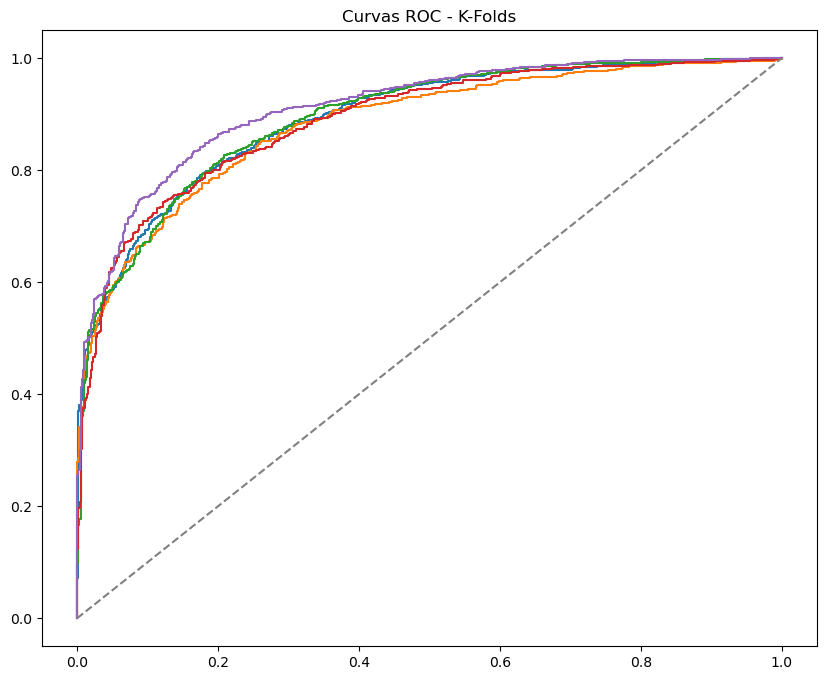

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Cargar el dataset
SUPPPORT2 = pd.read_csv("SUPPORT2_FAMD.csv")

# Definir las variables dependientes e independientes
Y = SUPPPORT2.loc[:, 'death'].to_numpy()
X = SUPPPORT2.drop(columns=['death']).to_numpy()  # Convertir a NumPy array

# Limpiar los datos eliminando los NaN en Y
X_scaled = X
Y_cleaned = Y

# ----------------- K-Fold Cross Validation -----------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicialización de variables para almacenar resultados
accuracies = []
roc_auc_scores = []

# Inicializar la figura para las curvas ROC
plt.figure(figsize=(10, 8))

# Realizar K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo GLM con familia binomial
    X_train_scaled_sm = sm.add_constant(X_train)  # Agregar constante para intercepto
    X_test_scaled_sm = sm.add_constant(X_test)  # Agregar constante para intercepto

    # Ajustar el modelo GLM
    glm_binom = sm.GLM(y_train, X_train_scaled_sm, family=sm.families.Binomial())
    res = glm_binom.fit()

    # Realizar predicciones sobre el conjunto de prueba
    y_pred_prob_glm = res.predict(X_test_scaled_sm)
    y_pred_glm = (y_pred_prob_glm > 0.5).astype(int)  # Clasificar como 1 si la probabilidad es mayor que 0.5

    # Evaluación: Precisión
    accuracy = metrics.accuracy_score(y_test, y_pred_glm)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob_glm)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# ----------------- Promedio de precisión -----------------
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_auc_scores)

# Mostrar precisión promedio y AUC promedio

# ----------------- Mostrar curva ROC promedio -----------------
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (no discriminación)
plt.title('Curvas ROC - K-Folds')

print(f"Precisión promedio : {avg_accuracy:.2f}")
print(f"AUC promedio : {avg_roc_auc:.2f}")


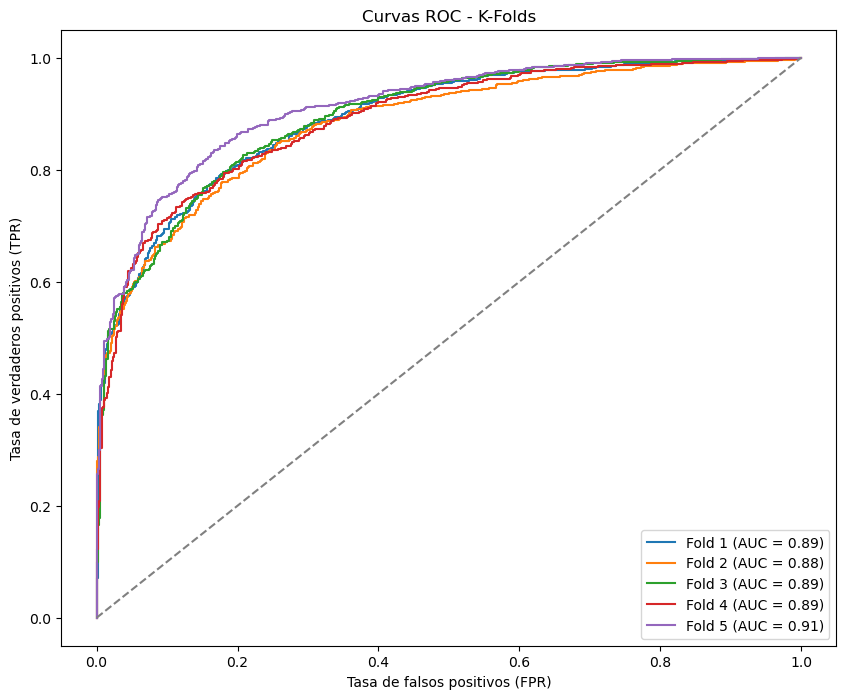

Precisión promedio: 0.82
AUC promedio: 0.89


In [2]:
from sklearn.linear_model import LogisticRegression 
# ----------------- K-Fold Cross Validation -----------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicialización de variables para almacenar resultados
accuracies = []
roc_auc_scores = []

# Inicializar la figura para las curvas ROC
plt.figure(figsize=(10, 8))

# Realizar K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo de regresión logística
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = log_model.predict(X_test)
    y_pred_prob = log_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Calcular y almacenar la precisión del modelo
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# ----------------- Promedio de precisión -----------------
avg_accuracy = np.mean(accuracies)


# ----------------- Mostrar curva ROC promedio -----------------
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (no discriminación)
plt.title('Curvas ROC - K-Folds')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

# Mostrar el AUC promedio
avg_roc_auc = np.mean(roc_auc_scores)
print(f"Precisión promedio: {avg_accuracy:.2f}")
print(f"AUC promedio: {avg_roc_auc:.2f}")

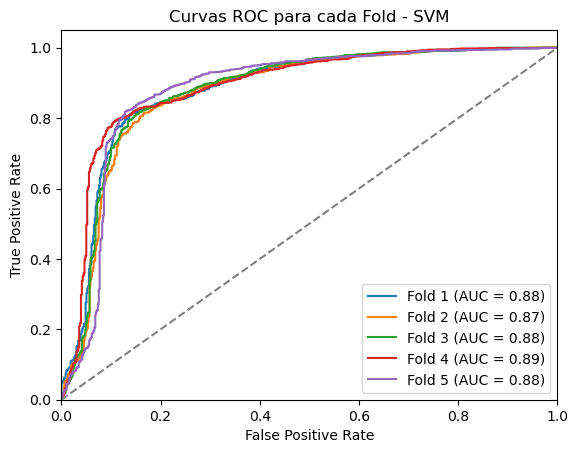

Precisión promedio: 0.83
AUC promedio: 0.88


In [3]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que tienes X_scaled y Y_cleaned como tus datos de entrada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar las métricas de precisión y AUC
accuracies = []
roc_auc_scores = []

# Realizar validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo SVM (RBF kernel en este caso)
    svm_model = SVC(kernel='rbf', gamma=0.5, C=0.1, probability=True)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = svm_model.predict(X_test)
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Calcular y almacenar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# Mostrar la gráfica de todas las curvas ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para cada Fold - SVM')
plt.legend(loc="lower right")
plt.show()

# Calcular y mostrar la precisión promedio y el AUC promedio
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_auc_scores)
print(f'Precisión promedio: {avg_accuracy:.2f}')
print(f'AUC promedio: {avg_roc_auc:.2f}')


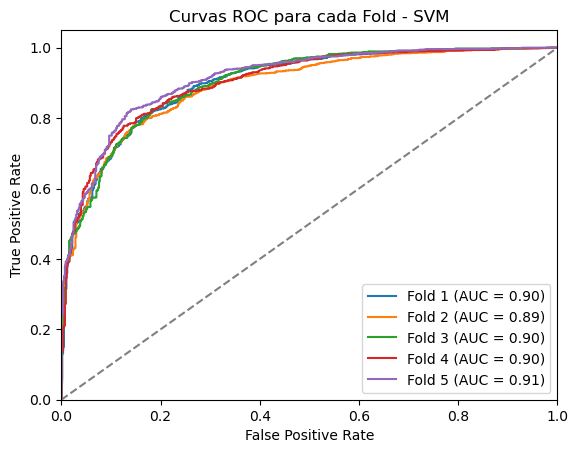

In [4]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Asumiendo que tienes X_scaled y Y_cleaned como tus datos de entrada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar las métricas de precisión y AUC
accuracies = []
roc_auc_scores = []

# Realizar validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo SVM (RBF kernel en este caso)
    svm_model = SVC(kernel='poly', degree=3, C=1, probability=True)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = svm_model.predict(X_test)
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Calcular y almacenar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Almacenar la matriz de confusión del tercer fold
    if fold == 2:  # El tercer fold corresponde a fold == 2
        confusion_matrix_third_fold = confusion_matrix(y_test, y_pred)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# Mostrar la gráfica de todas las curvas ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para cada Fold - SVM')
plt.legend(loc="lower right")
plt.show()


# Análisis de Resultados
Al aplicar el análisis factorial mixto y ajustar los modelos de aprendizaje supervisado, se observa una mejora considerable en los resultados. Además, se muestra que es posible trabajar con todas las variables, ya que ninguno de los ejes presenta correlaciones altas. Se puede concluir que el modelo que da mejores resultados es el SVM polinomial. Por lo tanto, se genera su matriz de adyacencia para su evaluación.

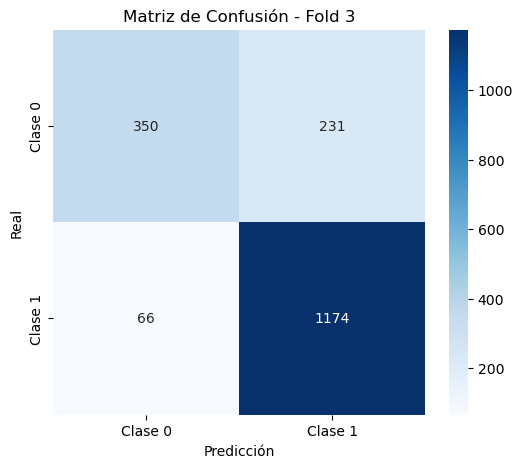

In [5]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_third_fold, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title(f'Matriz de Confusión - Fold 3')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()